In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

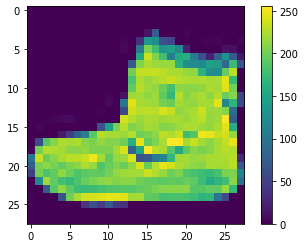

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

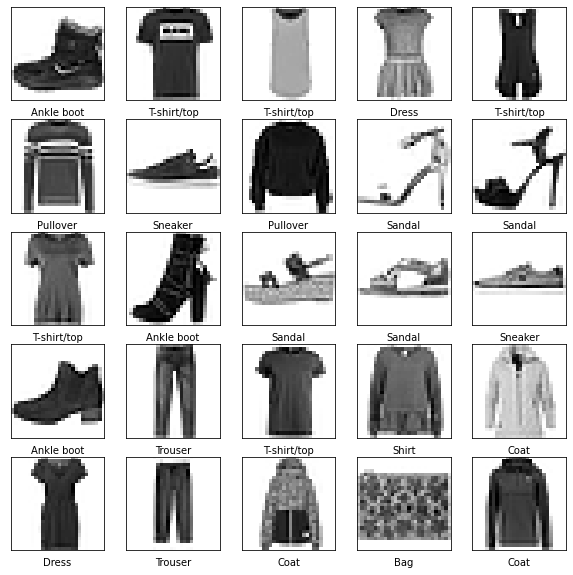

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 866us/step - loss: 0.4922 - accuracy: 0.8282
Epoch 2/20
1875/1875 [==============================] - 2s 843us/step - loss: 0.3735 - accuracy: 0.8657
Epoch 3/20
1875/1875 [==============================] - 2s 821us/step - loss: 0.3354 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 2s 812us/step - loss: 0.3116 - accuracy: 0.8866
Epoch 5/20
1875/1875 [==============================] - 2s 810us/step - loss: 0.2943 - accuracy: 0.8921
Epoch 6/20
1875/1875 [==============================] - 2s 810us/step - loss: 0.2821 - accuracy: 0.8961
Epoch 7/20
1875/1875 [==============================] - 2s 809us/step - loss: 0.2671 - accuracy: 0.9011
Epoch 8/20
1875/1875 [==============================] - 2s 821us/step - loss: 0.2554 - accuracy: 0.9059
Epoch 9/20
1875/1875 [==============================] - 2s 841us/step - loss: 0.2475 - accuracy: 0.9080
Epoch 10/20
1875/1875 [==============================] - 2s 824u

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 690us/step - loss: 0.3671 - accuracy: 0.8898
Test accuracy: 0.8898000121116638


In [10]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 623us/step


In [11]:
np.argmax(predictions[0])

9

In [12]:
test_labels[0]

9

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

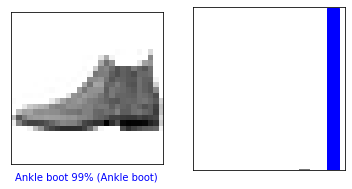

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

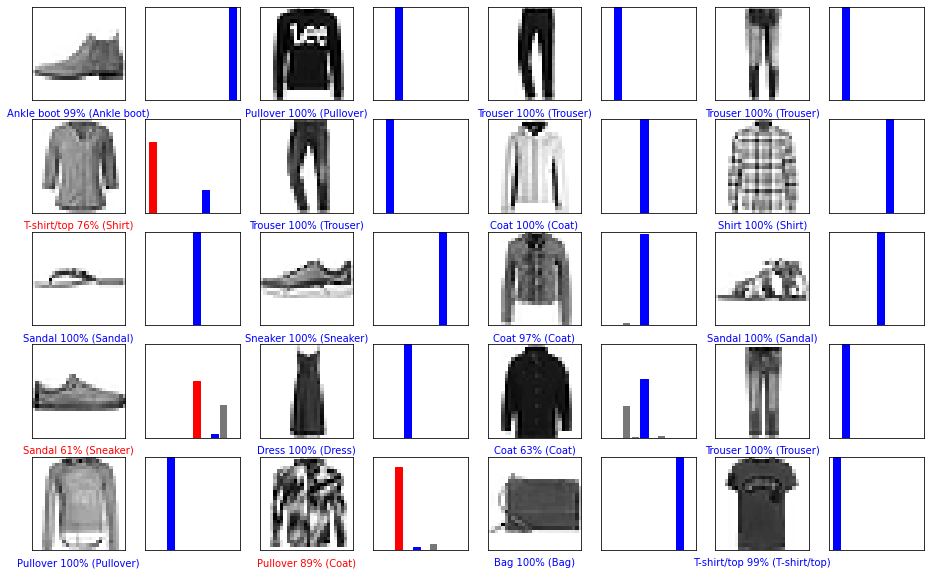

In [15]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)